## Data Information

    Data from May 2008 to November 2010


## Other Information

    Financial Crisis from the end of 2008, peaking on 2009, recovering process in 2010


## Column Information

    Age : Customer Age
    Job : Customer Job
    Marital : Customer Marital Status
    Education : Customer Education 
    Default : Customer Loan Default
    Housing : Customer on Housing Loan
    Loan : Customer on Personal Loan
    Contact : Contact Type
    Month : Last Contact Month
    Day Of Week : Last Contact Day
    Duration : Last Contact Duration
    Campaign : Number of Contact During This Campaign
    Pdays : Number of Days Since Last Contact
    Previous : Number of Contact on Other Previous Campaign
    Poutcome : Previous Campaign Result
    Emp Var Rate : Portugal Employement Variation Rate (Quarterly Indicator)
    Cons Price Idx : Portugal Consumer Price Index (Monthly Indicator)
    Cons Conf Idx : Portugal Consumer Confidence Index (Monthly Indicator)
    Euribor 3 M : Euro Interbank 3 Month Offered Rate, (Dialy Indicator)
    Nr Employed : Portugal Quarterly Employed Population (In Thousand)

## Customer Information

**Data Taken From:**

- **Age Group:**
    - 64.64% **Middle Age Group**
    - 17.92% **Young Adult Group**
    - 15.92% **Senior Group**
    - 1.50% **Elderly Group** 
- **Job:**
    - 25.30% **Admin**
    - 22.46% **Blue-Collar**
    - 16.37% **Technician**
    - 9.63% **Services**
    - 7.09% **Management**
    - 4.17% **Retired**
    - 3.45% **Entrepreneur**
    - 2.57% **Self-Employed**
    - 2.46% **Housemaid**
    - 2.12% **Unemployed**
    - 0.80% **Student**
- **Education:**
    - 42.30% **High Education Level**
    - 42.00% **Medium Education Level**
    - 15.70% **Low Education Level**
- **Marital:**
    - 60.50% **Married**
    - 28.10% **Single**
    - 11.20% **Divorced**
    - 0.20% **Unknown/Unstated**
- **Has Default Credit:**
    - 79.10% **No**
    - 20.90% **Unknown/unstated**
    - 0.01% **Yes**
- **Has Housing House:**
    - 52.40% **Yes**
    - 45.20% **No**
    - 2.40% **Unknown/Unstated**
- **Has A Personal Loan:**
    - 82.40% **No**
    - 15.20% **Yes**
    - 2.40% **Unknown/Unstated**
- **Contact:**
    - 63.50% **Cellular**
    - 36.50% **Telephone**
    
## Campaign Information

**Data Distribution:**
    
- **This Campaign Total Contact (by person):**
    - 42.80% **1 Times**
    - 25.70% **2 Times**
    - 18.50% **>3 Times**
    - 13.00% **3 Times**
- **Other Campaign Total Contact (by person):**
    - 86.30% **0 Times**
    - 11.10% **1 Times**
    - 1.80% **2 Times**
    - 0.80% **>2 Times**
- **Result Of Previous Campaign (by person):**
    - 86.30% **Not-Exist**
    - 10.30% **Failed**
    - 3.30% **Success**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xlrd
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('bank_marketing_campaign.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


**Encoding**

In [8]:
df['education'] = df['education'].map({
    'illiterate' : 0,
    'basic.4y' : 1,
    'basic.6y' : 2,
    'basic.9y' : 3,
    'unknown' : 4,
    'high.school' : 5,
    'university.degree' : 6,
    'professional.course' : 7
})
df['education'] = df['education'].astype(int)


df['contact'] = df['contact'].map({
    'telephone' : 0,
    'cellular' : 1
})
df['contact'] = df['contact'].astype(int)

df['poutcome'] = df['poutcome'].map({
    'failure' : 0,
    'nonexistent' : 1,
    'success' : 2
})
df['poutcome'] = df['poutcome'].astype(int)

df['y'] = df['y'].map({
    'no' : 0,
    'yes' : 1
})
df['y'] = df['y'].astype(int)

df['default'] = df['default'].map({
    'no' : 0,
    'unknown' : 1,
    'yes' : 2
})
df['default'] = df['default'].astype(int)

df['housing'] = df['housing'].map({
    'no' : 0,
    'unknown' : 1,
    'yes' : 2
})
df['housing'] = df['housing'].astype(int)

df['loan'] = df['loan'].map({
    'no' : 0,
    'unknown' : 1,
    'yes' : 2
})
df['loan'] = df['loan'].astype(int)

**Binning**

In [9]:
dfbin = df.copy()

age_bin = [10, 30, 50, 65, df['age'].max()]
age_labels = ['Young Adult', 'Middle Age', 'Senior', 'Elder']
dfbin['age_bin'] = pd.cut(df['age'], bins=age_bin, labels=age_labels)

edu_bin = [0, 2, 5, df['education'].max()]
edu_labels = ['Low', 'Medium', 'High']
dfbin['edu_bin'] = pd.cut(df['education'], bins=edu_bin, labels=edu_labels)

edu_bin_num = [0, 2, 5, df['education'].max()]
edu_labels_num = [1,2,3]
dfbin['edu_bin_num'] = pd.cut(df['education'], bins=edu_bin_num, labels=edu_labels_num)

campaign_bin = [0, 1, 2, 3, df['campaign'].max()]
campaign_labels = ['1', '2', '3', '>3']
dfbin['campaign_bin'] = pd.cut(df['campaign'], bins=campaign_bin, labels=campaign_labels)

previous_bin = [-1, 0.9, 1.9, 2.9, df['previous'].max()]
previous_labels = ['0', '1', '2', '>2']
dfbin['previous_bin'] = pd.cut(df['previous'], bins=previous_bin, labels=previous_labels)

consprice_bin = [91.5, 93, 94, df['cons.price.idx'].max()]
consprice_labels = ['Low', 'Medium', 'High']
dfbin['cons.price.idx'] = pd.cut(df['cons.price.idx'], bins=consprice_bin, labels=consprice_labels)

consconf_bin = [-52, -42.7, -41.8, -36.4, df['cons.conf.idx'].max()]
consconf_labels = ['ExtremeLow' ,'VeryLow', 'Low', 'MediumLow']
dfbin['cons.conf.idx'] = pd.cut(df['cons.conf.idx'], bins=consconf_bin, labels=consconf_labels)

dfbin['alljob'] = dfbin['job'].copy()

dfbin['job'][dfbin['job']=='unknown'] = 'Others'
dfbin['job'][dfbin['job']=='student'] = 'Others'
dfbin['job'][dfbin['job']=='unemployed'] = 'Others'
dfbin['job'][dfbin['job']=='housemaid'] = 'Others'
dfbin['job'][dfbin['job']=='self-employed'] = 'Others'

dfbin['month_full'] = dfbin['month'].copy()

dfbin['month'][dfbin['month']=='jan'] = '1'
dfbin['month'][dfbin['month']=='feb'] = '1'
dfbin['month'][dfbin['month']=='mar'] = '1'
dfbin['month'][dfbin['month']=='apr'] = '2'
dfbin['month'][dfbin['month']=='may'] = '2'
dfbin['month'][dfbin['month']=='jun'] = '2'
dfbin['month'][dfbin['month']=='jul'] = '3'
dfbin['month'][dfbin['month']=='aug'] = '3'
dfbin['month'][dfbin['month']=='sep'] = '3'
dfbin['month'][dfbin['month']=='oct'] = '4'
dfbin['month'][dfbin['month']=='nov'] = '4'
dfbin['month'][dfbin['month']=='dec'] = '4'

dfbin['employed_bin'] = dfbin['nr.employed'].copy()

employed_bin = [4963, 5017, 5099, dfbin['employed_bin'].max()]
employed_labels = ['Less Than 5017' ,  '5017-5099', 'More Than 5099']
dfbin['employed_bin'] = pd.cut(dfbin['employed_bin'], bins=employed_bin, labels=employed_labels)

dfbin['emp.var.rate'] = dfbin['emp.var.rate'].round(0)

dfbin['euribor3m'] = dfbin['euribor3m'].round(0)

#dfbin['cons.price.idx'] = dfbin['cons.price.idx'].round(0)

#dfbin['cons.conf.idx'] = dfbin['cons.conf.idx'].round(0)

In [10]:
df.corr()

,age,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.173225,0.164965,-0.001603,-0.007368,-0.007021,-0.000866,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
education,-0.173225,1.000000,-0.225996,0.020467,0.007401,0.105890,-0.016083,0.000352,-0.034357,0.030725,0.007141,-0.037712,-0.082581,0.054103,-0.031956,-0.030646,0.043008
default,0.164965,-0.225996,1.000000,-0.015815,-0.003782,-0.135238,-0.011794,0.032825,0.080062,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845,-0.099352
housing,-0.001603,0.020467,-0.015815,1.000000,0.044296,0.082186,-0.007658,-0.011010,-0.010551,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862,0.011552
loan,-0.007368,0.007401,-0.003782,0.044296,1.000000,0.008556,-0.000916,0.005166,0.000345,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903,-0.004909
contact,-0.007021,0.105890,-0.135238,0.082186,0.008556,1.000000,0.026657,-0.077368,-0.117970,0.212848,-0.118744,-0.393584,-0.591474,-0.251614,-0.399773,-0.269155,0.144773
duration,-0.000866,-0.016083,-0.011794,-0.007658,-0.000916,0.026657,1.000000,-0.071699,-0.047577,0.020640,0.033360,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,0.000352,0.032825,-0.011010,0.005166,-0.077368,-0.071699,1.000000,0.052584,-0.079141,0.032586,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.034357,0.080062,-0.010551,0.000345,-0.117970,-0.047577,0.052584,1.000000,-0.587514,-0.475619,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.030725,-0.102416,0.021314,-0.001327,0.212848,0.020640,-0.079141,-0.587514,1.000000,-0.313110,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181


In [11]:
#sns.heatmap(df.corr(), annot=True)

**Checking Target Distribution**

Target Response Distribution

In [12]:
(pd.crosstab(index=df['y'], columns='count', normalize=True)*100).round(2)

col_0,count
y,
0,88.73
1,11.27


**Checking Data Distribution And Outliers each Category**

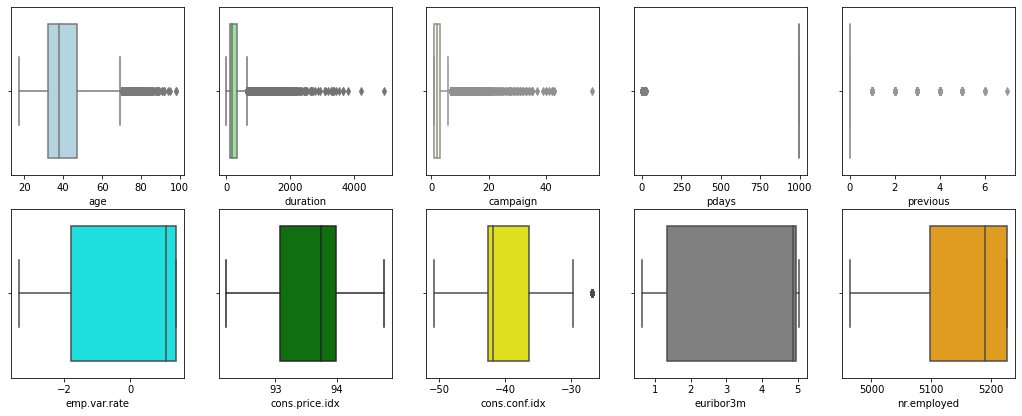

In [13]:
plt.figure(figsize=(18, 18))

plt.subplot(5,5,1)
sns.boxplot(df['age'], color='lightblue')

plt.subplot(5,5,2)
sns.boxplot(df['duration'], color='lightgreen')

plt.subplot(5,5,3)
sns.boxplot(df['campaign'], color='lightyellow')

plt.subplot(5,5,4)
sns.boxplot(df['pdays'], color='lightgrey')

plt.subplot(5,5,5)
sns.boxplot(df['previous'], color='white')

plt.subplot(5,5,6)
sns.boxplot(df['emp.var.rate'], color='cyan')

plt.subplot(5,5,7)
sns.boxplot(df['cons.price.idx'], color='green')

plt.subplot(5,5,8)
sns.boxplot(df['cons.conf.idx'], color='yellow')

plt.subplot(5,5,9)
sns.boxplot(df['euribor3m'], color='grey')

plt.subplot(5,5,10)
sns.boxplot(df['nr.employed'], color='orange')

plt.show()

**Customers Feature Distribution Pie Chart** 

Text(0.5, 1.0, 'Contact')

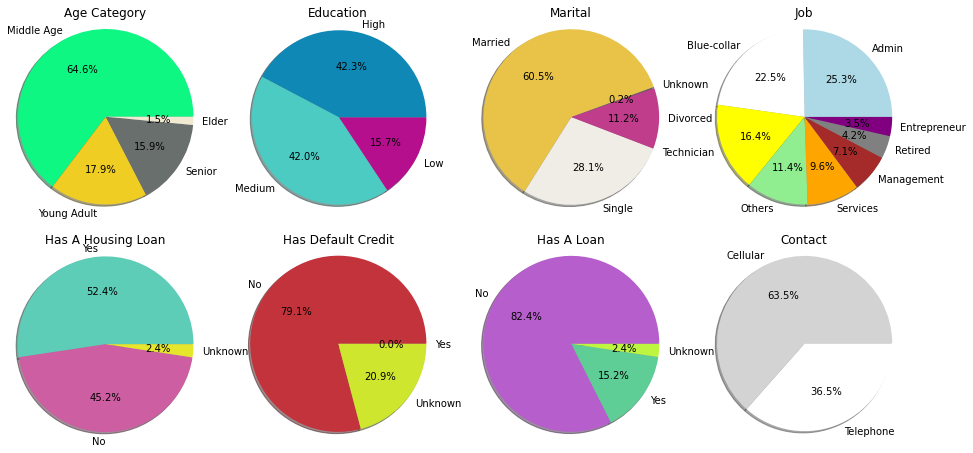

In [31]:
plt.figure(figsize=(16,16))

plt.subplot(4,4,1)
labels = 'Middle Age', 'Young Adult', 'Senior', 'Elder'
colors = ['#0FF783', '#EFCD23', '#696F6C', '#F0EAD2']
plt.pie(dfbin['age_bin'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Age Category')


plt.subplot(4,4,2)
labels =  'High', 'Medium', 'Low'
colors = ['#0F88B5', '#4CCBC3', '#B50F8E']
plt.pie(dfbin['edu_bin'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Education')

plt.subplot(4,4,3)
labels = 'Married', 'Single', 'Divorced', 'Unknown'
colors = ['#E9C347', '#EFEDE6', '#BF3D8B', '#696367']
plt.pie(df['marital'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)
plt.axis('equal')
plt.title('Marital')

plt.subplot(4,4,4)
labels = 'Admin', 'Blue-collar', 'Technician', 'Others', 'Services', 'Management', 'Retired', 'Entrepreneur'
colors = ['lightblue', 'white', 'yellow', 'lightgreen', 'orange', 'brown', 'grey', 'purple']
plt.pie(dfbin['job'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Job')

plt.subplot(4,4,5)
labels = 'Yes', 'No', 'Unknown'
colors = ['#5ECDB7', '#CD5EA1', '#E6E62D']
plt.pie(df['housing'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Has A Housing Loan')

plt.subplot(4,4,6)
labels = 'No', 'Unknown', 'Yes'
colors = ['#C3333C', '#CEE62D', '#2DE65E']
plt.pie(df['default'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Has Default Credit')

plt.subplot(4,4,7)
labels = 'No', 'Yes', 'Unknown'
colors = ['#B75ECD', '#5ECD96', '#BEF540']
plt.pie(df['loan'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Has A Loan')


plt.subplot(4,4,8)
labels = 'Cellular', 'Telephone'
colors = ['lightgrey', 'white']
plt.pie(dfbin['contact'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Contact')

**Contacts Distribution Charts**

Text(0.5, 1.0, 'Campaign Day')

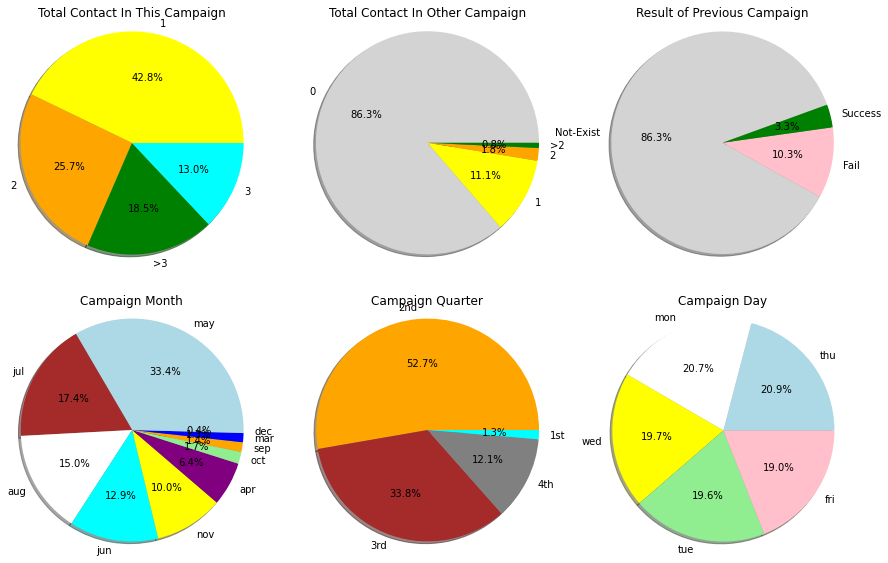

In [30]:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
labels = '1', '2', '>3', '3'
colors = ['yellow', 'orange', 'green', 'cyan']
plt.pie(dfbin['campaign_bin'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Total Contact In This Campaign')

plt.subplot(3,3,2)
labels = '0', '1', '2', '>2'
colors = ['lightgrey', 'yellow', 'orange', 'green']
plt.pie(dfbin['previous_bin'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Total Contact In Other Campaign')


plt.subplot(3,3,3)
labels = 'Not-Exist', 'Fail', 'Success'
colors = ['lightgrey', 'pink', 'green']
plt.pie(df['poutcome'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Result of Previous Campaign')


plt.subplot(3,3,4)
labels = 'may', 'jul', 'aug', 'jun', 'nov', 'apr', 'oct', 'sep', 'mar', 'dec'
colors = ['lightblue', 'brown', 'white', 'cyan', 'yellow', 'purple', 'lightgreen', 'orange', 'blue']
plt.pie(df['month'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Campaign Month')

plt.subplot(3,3,5)
labels = '2nd', '3rd', '4th', '1st'
colors = ['orange', 'brown', 'grey', 'cyan']
plt.pie(dfbin['month'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Campaign Quarter')


plt.subplot(3,3,6)
labels = 'thu', 'mon', 'wed', 'tue', 'fri'
colors = ['lightblue', 'white', 'yellow', 'lightgreen', 'pink']
plt.pie(df['day_of_week'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Campaign Day')

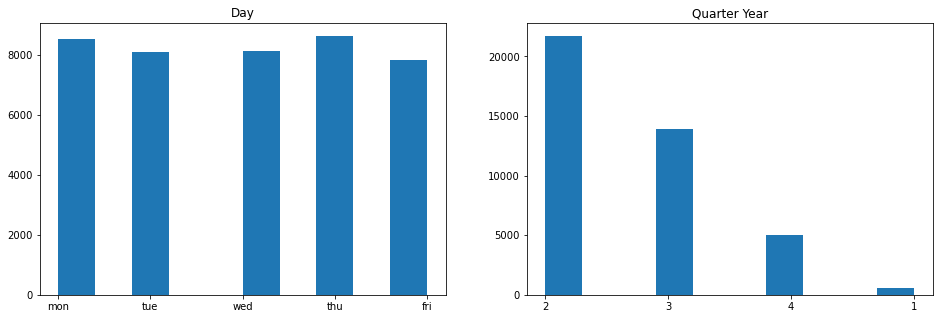

In [16]:
plt.figure(figsize=(16, 5))

plt.subplot(1,2,1)
plt.hist(df['day_of_week'])
plt.title('Day')

plt.subplot(1,2,2)
plt.hist(dfbin['month'])
plt.title('Quarter Year')

plt.show()

**Handling Outliers**

Dropping outliers is not needed

**Handling Missing Value**

Drop Columns "pdays", 90++% value == 999, means "unknown"

In [17]:
df = df.drop(columns='pdays')
dfbin = dfbin.drop(columns='pdays')

**Drop Unnecessary Column**

Duration Can't Be Used In Making Prediction Analysis And Machine Learning, Since Duration Is Not Known Yet Prior Contact

Employment Variation Rate Is Not Relevant, Since There's No Specific Date Available In This Data And The Previous Employment Rate Is Not Available In This Data. 

    - A Small Minus on Employment Rate, Would Be A Normal Fluctuation If There's Positive Rally on Employment Rate During Previous Quarters
    - On The Other Hand, A Small Minus on Employment Rate Would Have Worst Impact If There's A Heavy Downtrend During Previous Quarters
    - Columns on Number Of Employed Can Be Used As Paramter On Employed Population Size
    
Consumer Price Index Is Not Relevant, Since There's No Specific Date Available In This Data

    Lower Consumer Price Index on 2008 And Higher Consumer Price Index on 2010 Will Be A Different Economic Landscape Compared To Higher Consumer Price Index on 2008 And Lower Consumer Price Index on 2010
    
Consumer Confidence Index Is Not Relevant, Since This Case Is About Term Deposits Marketing

    Low Consumer Confidence Index Is Related To Society Opinions on Economy, This Will Affect Consumer Spending Rate
    
    On The Other Hand, Low Consumer Confidence Index Does Not Always Related To Low Saving Rate
    
    Low Consumer Confidence Index Could Be Caused By Either The Society Is Running Out Of Money, Or The Society Prefers To Save Money Rather Than Spending It on Tertiarry Products

In [18]:
df = df.drop(columns=['duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx'])
dfbin = dfbin.drop(columns=['duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx'])

**Save Data CSV for Further EDA**

In [19]:
df.to_csv('BankMarketingEDA.csv', index = False)
dfbin.to_csv('BankMarketingEDABin.csv', index = False)